# Erdos-Renyi Graphs

Code examples from [Think Complexity, 2nd edition](http://greenteapress.com/wp/complexity2), Chapter 2

Copyright 2016 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [188]:
from __future__ import print_function, division

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

import networkx as nx
import numpy as np

# colors from our friends at http://colorbrewer2.org
COLORS = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462',
          '#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']

In [189]:
from thinkstats2 import RandomSeed
RandomSeed(17)

## Directed graph

The first example is a directed graph that represents a social network with three nodes.

In [190]:
G = nx.DiGraph()
G.add_node('Alice')
G.add_node('Bob')
G.add_node('Chuck')
G.nodes()

['Bob', 'Alice', 'Chuck']

Here's how we add edges between nodes.

In [191]:
G.add_edge('Alice', 'Bob')
G.add_edge('Alice', 'Chuck')
G.add_edge('Bob', 'Alice')
G.add_edge('Bob', 'Chuck')
G.edges()

[('Bob', 'Alice'), ('Bob', 'Chuck'), ('Alice', 'Bob'), ('Alice', 'Chuck')]

And here's how to draw the graph.

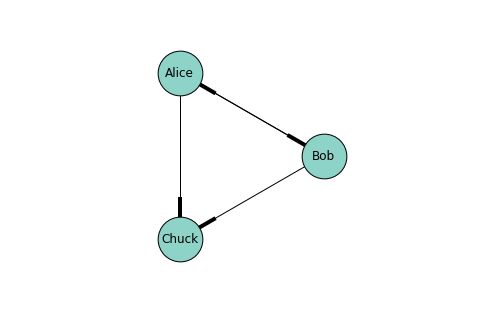

In [192]:
nx.draw_circular(G, 
                 node_color=COLORS[0], 
                 node_size=2000, 
                 with_labels=True)
plt.axis('equal')
plt.savefig('chap02-1.pdf')

**Exercise:**  Add another node and a few more edges and draw the graph again.

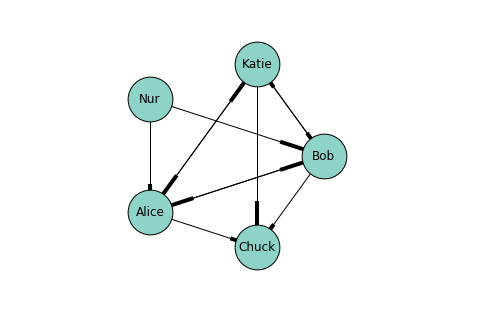

In [193]:
G.add_node('Katie')
G.add_node('Nur')
G.nodes()
G.add_edge('Katie', 'Bob')
G.add_edge('Bob', 'Katie')
G.add_edge('Katie', 'Alice')
G.add_edge('Alice', 'Katie')
G.add_edge('Katie', 'Chuck')
G.add_edge('Nur', 'Bob')
G.add_edge('Nur', 'Alice')
G.edges()
nx.draw_circular(G, 
                 node_color=COLORS[0], 
                 node_size=2000, 
                 with_labels=True)
plt.axis('equal')
plt.savefig('chap02-1.pdf')

## Undirected graph

The second example is an undirected graph that represents cities and the driving times between them.

`pos` is a dictionary that maps from each city to its coordinates.

In [194]:
pos = dict(Albany=(-74, 43),
          Boston=(-71, 42),
          NYC=(-74, 41),
          Philly=(-75, 40))
pos['Albany']

(-74, 43)

We can use the keys in `pos` to add nodes to the graph.

In [195]:
G = nx.Graph()
G.add_nodes_from(pos)
G.nodes()

['NYC', 'Albany', 'Philly', 'Boston']

`drive_times` is a dictionary that maps from pairs of cities to the driving times between them.

In [196]:
drive_times = {('Albany', 'Boston'): 3,
               ('Albany', 'NYC'): 4,
               ('Boston', 'NYC'): 4,
               ('NYC', 'Philly'): 2}

We can use the keys from `drive_times` to add edges to the graph.

In [197]:
G.add_edges_from(drive_times)
G.edges()

[('NYC', 'Boston'), ('NYC', 'Philly'), ('NYC', 'Albany'), ('Albany', 'Boston')]

Now we can draw the graph using `pos` to indicate the positions of the nodes, and `drive_times` to label the edges.

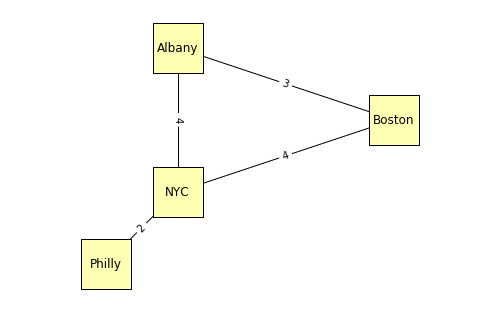

In [198]:
nx.draw(G, pos, 
        node_color=COLORS[1], 
        node_shape='s', 
        node_size=2500, 
        with_labels=True)

nx.draw_networkx_edge_labels(G, pos, 
                             edge_labels=drive_times)

plt.axis('equal')
plt.savefig('chap02-2.pdf')

**Exercise:**  Add another city and at least one edge.

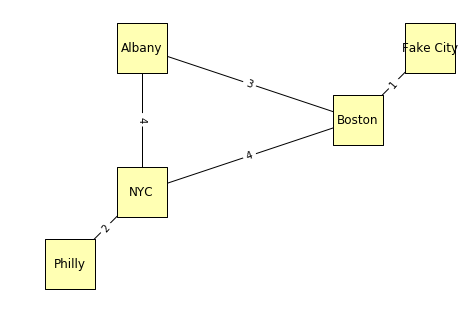

In [199]:
pos['Fake City'] = (-70, 43)
drive_times[('Boston', 'Fake City')] = 1
G = nx.Graph()
G.add_nodes_from(pos)
G.nodes()
G.add_edges_from(drive_times)
G.edges()
nx.draw(G, pos, 
        node_color=COLORS[1], 
        node_shape='s', 
        node_size=2500, 
        with_labels=True)

nx.draw_networkx_edge_labels(G, pos, 
                             edge_labels=drive_times)

plt.axis('equal')
plt.savefig('chap02-2.pdf')

## Complete graph

To make a complete graph, we use a generator function that iterates through all pairs of nodes.

In [200]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

`make_complete_graph` makes a `Graph` with the given number of nodes and edges between all pairs of nodes.

In [201]:
def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

Here's a complete graph with 10 nodes:

In [202]:
complete = make_complete_graph(10)
len(complete.nodes())

10

And here's what it looks like.

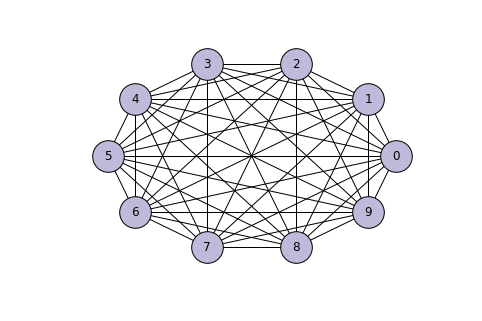

In [203]:
nx.draw_circular(complete, 
                 node_color=COLORS[2], 
                 node_size=1000, 
                 with_labels=True)
plt.savefig('chap02-3.pdf')

The `neighbors` method returns a list of neighbors for a given node.

In [204]:
complete.neighbors(0)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

**Exercise:** Make and draw complete directed graph with 5 nodes.

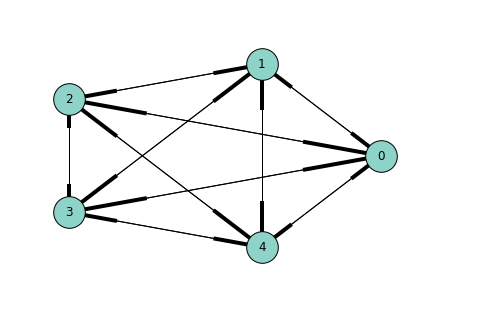

In [205]:
# Referenced solution for directed_edges
def directed_edges(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i != j:
                yield u, v
def make_complete_directed_graph(n):
    G = nx.DiGraph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(directed_edges(nodes))
    return G

my_complete_directed = make_complete_directed_graph(5)
nx.draw_circular(my_complete_directed,
                 node_color=COLORS[0],
                 node_size=1000,
                 with_labels=True)

## Random graphs

Next we'll make a random graph where the probability of an edge between each pair of nodes is $p$.

The helper function `flip` returns True with probability `p` and False with probability `1-p`

In [206]:
from numpy.random import random

def flip(p):
    return random() < p

`random_pairs` is a generator function that enumerates all possible pairs of nodes and yields each one with probability `p` 

In [207]:
def random_pairs(nodes, p):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i<j and flip(p):
                yield u, v

`make_random_graph` makes an ER graph where the probability of an edge between each pair of nodes is `p`.

In [208]:
def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G

Here's an example with `n=10` and `p=0.3`

In [209]:
random_graph = make_random_graph(10, 0.3)
len(random_graph.edges())

17

And here's what it looks like:

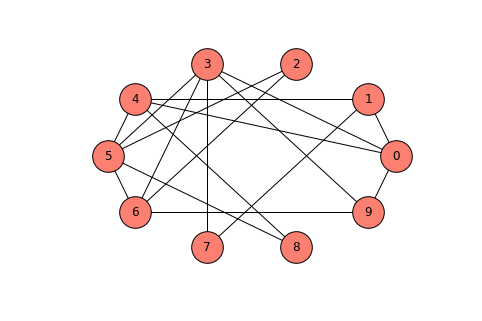

In [210]:
nx.draw_circular(random_graph, 
                 node_color=COLORS[3], 
                 node_size=1000, 
                 with_labels=True)
plt.savefig('chap02-4.pdf')

## Connectivity

To check whether a graph is connected, we'll start by finding all nodes that can be reached, starting with a given node:

In [211]:
def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

In the complete graph, starting from node 0, we can reach all nodes:

In [212]:
reachable_nodes(complete, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In the random graph we generated, we can also reach all nodes (but that's not always true):

In [213]:
reachable_nodes(random_graph, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [214]:
def is_connected(G):
    start = next(G.nodes_iter())
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G)

Again, the complete graph is connected:

In [215]:
is_connected(complete)

True

But if we generate a random graph with a low value of `p`, it's not:

In [216]:
random_graph = make_random_graph(10, 0.1)
len(random_graph.edges())

6

We can use `reachable_nodes` to check whether a graph is connected:

In [217]:
is_connected(random_graph)

False

**Exercise:** What do you think it means for a directed graph to be connected?  Write a function that checks whether a directed graph is connected.

In [218]:
""" I think directed graph is connected when each node is directionally connected to every other node.
There is a one way edge in each direction.

EDIT:
Looking into this further (including checking solutions to exercises), I have learned that
a directed graph is strongly connected  strongly if there is a directed path between every pair of vertices.
Answer modified to match solution. /chap02soln.ipynb 

Was confused but now understand this better after going over soultions and these andwers are from solutions."""

def reachable_nodes_directed(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.successors(node))
    return seen
    
    
def is_directed_connected(G):
    for start in G.nodes_iter():
        reachable = reachable_nodes_directed(G, start)
        if len(reachable) < len(G):
            return False
    return True
        
complete_directed_graph = make_complete_directed_graph(5)
is_directed_connected(complete_directed_graph)


True

## Probability of connectivity

Now let's estimare the probability that a randomly-generated ER graph is connected.

This function takes `n` and `p`, generates `iters` graphs, and returns the fraction of them that are connected.

In [219]:
def prob_connected(n, p, iters=100):
    count = 0
    for i in range(iters):
        random_graph = make_random_graph(n, p)
        if is_connected(random_graph):
            count += 1
    return count/iters

With `n=10` and `p=0.3`, the probability of being connected is about 65%.

In [220]:
n = 10
prob_connected(n, 0.3, iters=10000)

0.6494

According to Erdos and Renyi, the critical value of `p` for `n=10` is about 0.23. 

In [221]:
pstar = np.log(n) / n
pstar

0.23025850929940458

So let's plot the probability of connectivity for a range of values for `p`

In [222]:
ps = np.logspace(-1.3, 0, 11)
ps

array([ 0.05011872,  0.0676083 ,  0.09120108,  0.12302688,  0.16595869,
        0.22387211,  0.30199517,  0.40738028,  0.54954087,  0.74131024,  1.        ])

I'll estimate the probabilities with `iters=1000`

In [223]:
ys = [prob_connected(n, p, 1000) for p in ps]

for p, y in zip(ps, ys):
    print(p, y)

0.0501187233627 0.0
0.0676082975392 0.0
0.0912010839356 0.004
0.123026877081 0.016
0.165958690744 0.11
0.223872113857 0.346
0.30199517204 0.664
0.407380277804 0.899
0.549540873858 0.989
0.741310241301 1.0
1.0 1.0


And then plot them, adding a vertical line at the computed critical value

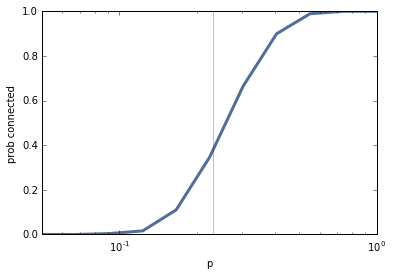

In [ ]:
import thinkplot

thinkplot.vlines([pstar], 0, 1, color='gray')
thinkplot.plot(ps, ys)
thinkplot.config(xlabel='p', ylabel='prob connected', xscale='log', xlim=[ps[0], ps[-1]])
plt.savefig('chap02-5.pdf')

We can run the same analysis for a few more values of `n`.

In [ ]:
ns = [30, 100, 300]
ps = np.logspace(-2.5, 0, 11)

thinkplot.preplot(len(ns))
for n in ns:
    pstar = np.log(n) / n
    thinkplot.vlines([pstar], 0, 1, color='gray')

    ys = [prob_connected(n, p) for p in ps]
    thinkplot.plot(ps, ys, label='n=%d' % n)

thinkplot.config(xlabel='p', ylabel='prob connected',
                 xscale='log', xlim=[ps[0], ps[-1]],
                 loc='upper left')
plt.savefig('chap02-6.pdf')

As `n` increases, the critical value gets smaller and the transition gets more abrupt.

## Exercises

**Exercise:** In Chapter 2 we analyzed the performance of `reachable_nodes` and classified it in $O(n + m)$, where $n$ is the number of nodes and $m$ is the number of edges.  Continuing the
analysis, what is the order of growth for `is_connected`?

    def is_connected(G):
        start = next(G.nodes_iter())
        reachable = reachable_nodes(G, start)
        return len(reachable) == len(G)

In [ ]:
# documentation referenced: https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.MultiGraph.nodes_iter.html)
# The iterator is created: Constant time
# reachable_nodes: O(n+m)
# check if len(reachable) == len(G): Constant time

# Order of growth for is_connected; O(n+m)

**Exercise:** In my implementation of `reachable_nodes`, you might be bothered by the apparent inefficiency of adding *all* neighbors to the stack without checking whether they are already in `seen`.  Write a version of this function that checks the neighbors before adding them to the stack.  Does this "optimization" change the order of growth?  Does it make the function faster?

In [ ]:

def reachable_nodes_precheck(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            for neighbor_node in G.neighbors(node):
                if neighbor_node not in seen:
                    stack.append(neighbor_node)
                
    return seen

It does not change the order of growth.
Each time through the loop, pop a node off the stack (constant time)
Check if node is in seen (constant time)
If node not in seen add it (constant time)
Loop through neighbors (linear w/ how many neighbors, m)
Check if neighbor is in seen (constant time)
Append neighbor_node to stack if not in seen (constant time)

Still O(n+m)
This is not actually an optimization .

In [ ]:
%timeit len(reachable_nodes(complete, 0))

In [ ]:
%timeit len(reachable_nodes_precheck(complete, 0))

**Exercise:** There are actually two kinds of ER graphs.  The one we generated in the chapter, $G(n, p)$, is characterized by two parameters, the number of nodes and the probability of an edge between nodes.

An alternative definition, denoted $G(n, m)$, is also characterized by two parameters: the number of nodes, $n$, and the number of edges, $m$.  Under this definition, the number of edges is fixed, but their location is random.

Repeat the experiments we did in this chapter using this alternative definition.  Here are a few suggestions for how to proceed:

1. Write a function called `m_pairs` that takes a list of nodes and the number of edges, $m$, and returns a random selection of $m$ edges.  A simple way to do that is to generate a list of all possible edges and use `random.sample`.

2. Write a function called `make_m_graph` that takes $n$ and $m$ and returns a random graph with $n$ nodes and $m$ edges.

3. Make a version of `prob_connected` that uses `make_m_graph` instead of `make_random_graph`.

4. Compute the probability of connectivity for a range of values of $m$.

How do the results of this experiment compare to the results using the first type of ER graph?

In [ ]:
import random
def m_pairs(nodes, m):
    """Takes a list of nodes and the number of edges, m, and retuurns a random selection of m edges"""
    node_pairs = list(all_pairs(nodes)) # list of all possible edges
    edge_pairs = random.sample(node_pairs, m) 
    return edge_pairs #random sample

In [ ]:
def make_m_graph(n, m):
    """Takes n and m and returns a random graph with n nodes and m edges"""
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(m_pairs(nodes, m))
    return G


In [ ]:
def prob_connected_m(n, m, iters=100):
    count = 0
    for i in range(iters):
        random_graph = make_m_graph(n, m)
        if is_connected(random_graph):
            count += 1
    return count/iters


In [ ]:
prob_connected_m(5, 4)

It is not clear to me how these results are supposed to be compared. They both give information about the probability that a graph is connected, but are based on different information.

## Response to Chapter 1 based on reading and Tuesday's panel discussion. 

I find it fascinating that complexity science could give people the tools and methods to explore new problems and gain a greater understanding of the world than they ever could before. From what I have heard and read in the last week, it seems like there are systems that people do not understand that complexity science and models created using complexity science could give us greater insights about. It is interesting to me that when creating models with complexity science, these models can be taken a few steps further than the point where humans can really understand every step of what is going on. This was visualized well in the optional reading "Wonderful Widgets" about software being used to create more efficient shapes for mechanical parts. While some may argue that this is a drawback that people don't understand what is happening, I think it also shows that applying complexity science to new systems and problems could allow us to understand those systems in new ways that we could not see before.


When it is new to you, it can be a challenge just to wrap your head around what complexity science is. Every class meeting I think I have understood this a little bit better. Overall, people are in agreement that complexity science is an approach to understanding complex systems through detailed computational models and simulations that can tell us more about the world and how many pieces interact with each other. 

It is a debate whether complexity science is even a science at all. Some consider it pseudo-science. It might not matter whether this work was called science or not, except that being an accepted science gives it an extra degree of ccredibility, would allow complexity science work to be published in scientific journals, and bring this work to more people. A strong argument against complexity science being a science is that it does not follow the traditional scientific method. Experiments cannot be performed in the same way. Personally, I am not yet sure whether I consider it to be a science in the same way that other sciences such as physics or chemistry are sciences, but I do believe that it is valuable and should be taken seriously. I expect my thoughts on this to develop further over the course of the semester. Perhaps I will be convinced that it is a science, or maybe that it really does not matter whether or not it is. A possible way to think about it might be that the model created is a hypothesis and comparing it to the real world is the experimental phase. 

In the next few weeks and months I am sure we will be exposed to a lot more information and many more opinions about this subject. I am excited to see how this will affect the future of science and how we approach complex problems.


##### Other non-provided resources used/read:
- https://faculty.unlv.edu/phelan/Phelan_What%20is%20complexity%20science.pdf
- https://www.bigquestionsonline.com/2014/01/20/how-can-study-complexity-transform-our-understanding-world/
